# The number of confirmed cases in Australia


In [97]:
import project_functions
from sklearn import linear_model
df = project_functions.load_and_process("../data/raw/confirmed_cases_table1_location.csv")
df

,notification_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19
0,25/01/2020,2121,X760,Northern Sydney,16260,Parramatta (C)
1,25/01/2020,2134,X700,Sydney,11300,Burwood (A)
2,25/01/2020,2071,X760,Northern Sydney,14500,Ku-ring-gai (A)
3,27/01/2020,2033,X720,South Eastern Sydney,16550,Randwick (C)
4,01/03/2020,2077,X760,Northern Sydney,14000,Hornsby (A)
...,...,...,...,...,...,...
63018,30/09/2021,2037,X700,Sydney,17200,Sydney (C)
63019,30/09/2021,2500,X730,Illawarra Shoalhaven,18450,Wollongong (C)
63020,30/09/2021,2300,X800,Hunter New England,15900,Newcastle (C)
63021,30/09/2021,2530,X730,Illawarra Shoalhaven,18450,Wollongong (C)


In [98]:
df.isnull().sum()

notification_date    0
postcode             0
lhd_2010_code        0
lhd_2010_name        0
lga_code19           0
lga_name19           0
dtype: int64

In [99]:
df2 = df.groupby(df.columns.tolist()).size().reset_index().\
    rename(columns={0:'Cases'})

In [10]:
df1 = df.groupby(df.columns.tolist()).size().reset_index().\
    rename(columns={0:'Cases'})

In [31]:
df1

,notification_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19,Cases
0,2021-01-01,2019,X720,South Eastern Sydney,10500,Bayside (A),1
1,2021-01-01,2023,X720,South Eastern Sydney,18500,Woollahra (A),4
2,2021-01-01,2067,X760,Northern Sydney,18250,Willoughby (C),1
3,2021-01-01,2119,X760,Northern Sydney,14000,Hornsby (A),1
4,2021-01-01,2144,X740,Western Sydney,12380,Cumberland (A),1
...,...,...,...,...,...,...,...
14349,2020-12-31,2000,X720,South Eastern Sydney,17200,Sydney (C),1
14350,2020-12-31,2060,X760,Northern Sydney,15950,North Sydney (A),1
14351,2020-12-31,2143,X740,Western Sydney,11570,Canterbury-Bankstown (A),1
14352,2020-12-31,2144,X740,Western Sydney,12380,Cumberland (A),1


# Moving forward to the research questions, we can now answer the following: 

## 1. How do we plot the number of confirmed cases for all the cities in Australia? Which part of Australia has the highest number of COVID-19 cases? Which part of Australia has the lowest number of COVID-19 cases? 

## We can plot the total number of COVID-19 confirmed cases in Australia through different visualisations such as scatter plot and bar plot. Based on the bar plot of confirmed cases (shown in figure 3), we can identify that South Western Sydney has the highest number of confirmed cases with a total value of 19375 followed by Western Sydney with a total of 17606 cases. Mid North Coast has the lowest COVID-19 confirmed cases. 


In [13]:
# highest number of cases
loc_max = df1['Cases'].idxmax()
df1.iloc[loc_max]

notification_date              08/09/2021
postcode                             2170
lhd_2010_code                        X710
lhd_2010_name        South Western Sydney
lga_code19                          14900
lga_name19                  Liverpool (C)
Cases                                  95
Name: 2955, dtype: object

In [17]:
# lowest number of cases
loc_min = df1['Cases'].idxmin()
df1.iloc[loc_min]

notification_date              01/01/2021
postcode                             2019
lhd_2010_code                        X720
lhd_2010_name        South Eastern Sydney
lga_code19                          10500
lga_name19                    Bayside (A)
Cases                                   1
Name: 0, dtype: object

In [90]:
df1.dtypes

notification_date    datetime64[ns]
postcode                     string
lhd_2010_code                  int8
lhd_2010_name                  int8
lga_code19                     int8
lga_name19                     int8
Cases                         int64
dtype: object

In [50]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df1['notification_date'] = pd.to_datetime(df1['notification_date'])

In [81]:
df1.lhd_2010_name = pd.Categorical(df1.lhd_2010_name)
df1['lhd_2010_name'] = df1.lhd_2010_name.cat.codes
df1.lhd_2010_code = pd.Categorical(df1.lhd_2010_code)
df1['lhd_2010_code'] = df1.lhd_2010_code.cat.codes
df1.lga_name19 = pd.Categorical(df1.lga_name19)
df1['lga_name19'] = df1.lga_name19.cat.codes
df1.lga_code19 = pd.Categorical(df1.lga_code19)
df1['lga_code19'] = df1.lga_code19.cat.codes

In [63]:
features = ['lhd_2010_name','lhd_2010_code', 'lga_name19', 'lga_code19']

In [64]:
x = df1[features]
y = df1.Cases

In [65]:
# how to perform regression analysis
regression = linear_model.LinearRegression()
regression.fit(x, y)

LinearRegression()

In [66]:
# predicted values
predict = regression.predict(x)
predict

array([6.10824211, 2.267322  , 1.78564615, ..., 6.62030668, 6.27180059,
       6.27180059])

In [163]:
df1['predicts'] = predict
df1

,notification_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19,Cases,predicts
0,2021-01-01,2019,2,10,5,5,1,6.108242
1,2021-01-01,2023,2,10,117,118,4,2.267322
2,2021-01-01,2067,6,9,113,114,1,1.785646
3,2021-01-01,2119,6,9,49,50,1,3.955690
4,2021-01-01,2144,4,15,31,32,1,6.271801
...,...,...,...,...,...,...,...,...
14349,2020-12-31,2000,2,10,96,97,1,2.979368
14350,2020-12-31,2060,6,9,76,77,1,3.040203
14351,2020-12-31,2143,4,15,22,22,1,6.620307
14352,2020-12-31,2144,4,15,31,32,1,6.271801


In [67]:
R_2 = regression.score(x, y)
R_2

0.05695652167580767

## 2. Which location is expected to have an increase in the reported cases?

## Based on the prediction model, Western Sydney would have an increase in the reported cases. 

In [166]:
# highest predicted value
loc_max_predict = df1['predicts'].idxmax()
df2.iloc[loc_max_predict]

notification_date        01/01/2021
postcode                       2769
lhd_2010_code                  X740
lhd_2010_name        Western Sydney
lga_code19                    10750
lga_name19            Blacktown (C)
Cases                             1
Name: 7, dtype: object

## 3. By the analysis of the data, how can we predict the future trend of the virus?

## Using multiple regression we can predict the future outcomes of the reported cases. The R² value is 0.05696 which indicates a good fit and accuracy of data to the model

## 4. How can we visualize a large amount of datasets?
## First, you need to clean the data. If there are unnecessary columns, missing data, and any other information recorded, you can either clean the data or remove entries that have missing data. Predict it and visualize it.

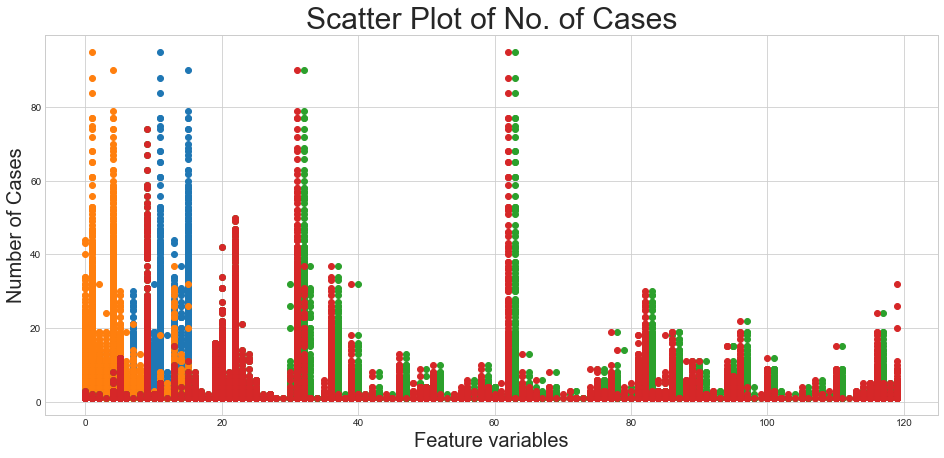

In [138]:
# Figure 1:
# scatter plot
# for dashboard and visualisation
plt.rcParams["figure.figsize"] = (16,7)
plt.style.use('seaborn-whitegrid')
plt.title("Scatter Plot of No. of Cases", fontsize=30)
plt.xlabel('Feature variables', fontsize=20)
plt.ylabel('Number of Cases', fontsize=20)
plt.plot(x,y, 'o')

## Figure 1 shows the scatter plot of the number of COVID-19 confirmed cases. The figure shows the different feature variables that are contained within the dataset. As we can see, the plot for the number of confirmed cases contains 4 feature variables. Using regression analysis, we can predict the number of confirmed cases. Using the scatter plot, we can present the predicted values of the confirmed number of reported cases with the utilization of regression analysis. 

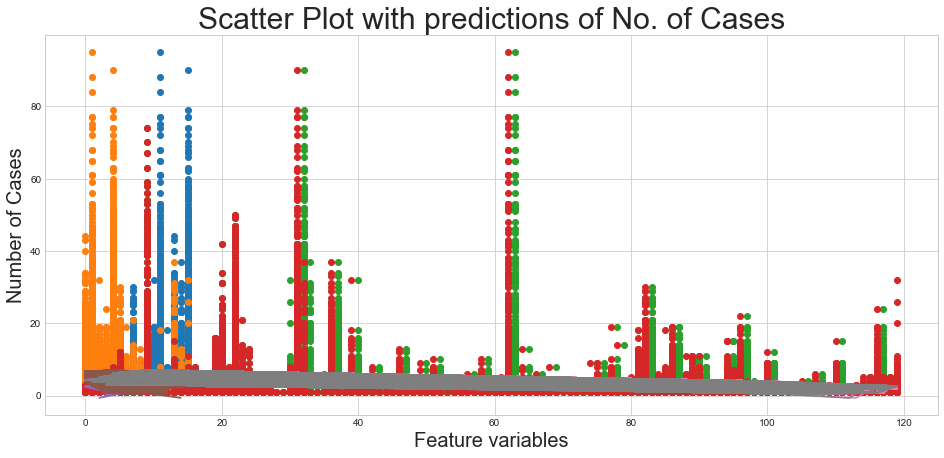

In [140]:
# Figure 2:
# scatter plot with predicted values (lines)
# can be added in dashboard or visualisation
plt.rcParams["figure.figsize"] = (16,7)
plt.title("Scatter Plot with predictions of No. of Cases", fontsize=30)
plt.xlabel('Feature variables', fontsize=20)
plt.ylabel('Number of Cases', fontsize=20)
plt.plot(x,y, 'o')
plt.plot(x,predict)

## Figure 2 shows the scatter plot for the predicted values of COVID-19 cases. The predictive analysis was done through the use of regression analysis (linear regression model). The results of regression analysis for prediction shows the R² value is 0.05695652167580767 which indicates a good fit for the model. The data does not fit based on the result since its R² is not closer to 1.

In [101]:
barplot = df2.groupby(['lhd_2010_name'])['Cases'].transform('sum')
barplot

0         5963
1         5963
2         2271
3         2271
4        17606
         ...  
14349     5963
14350     2271
14351    17606
14352    17606
14353    17606
Name: Cases, Length: 14354, dtype: int64

In [118]:
df3 = pd.DataFrame(df2['lhd_2010_name'].values, columns = ['lhd_2010_name'])
df3['Cases'] = barplot
df3 = df3.drop_duplicates(subset=['lhd_2010_name', 'Cases'])

In [119]:
df3

,lhd_2010_name,Cases
0,South Eastern Sydney,5963
2,Northern Sydney,2271
4,Western Sydney,17606
5,Sydney,6813
6,South Western Sydney,19375
64,Central Coast,885
66,Hunter New England,1321
78,Mid North Coast,76
80,Northern NSW,85
81,Illawarra Shoalhaven,1707


Text(0, 0.5, 'No. of Cases')

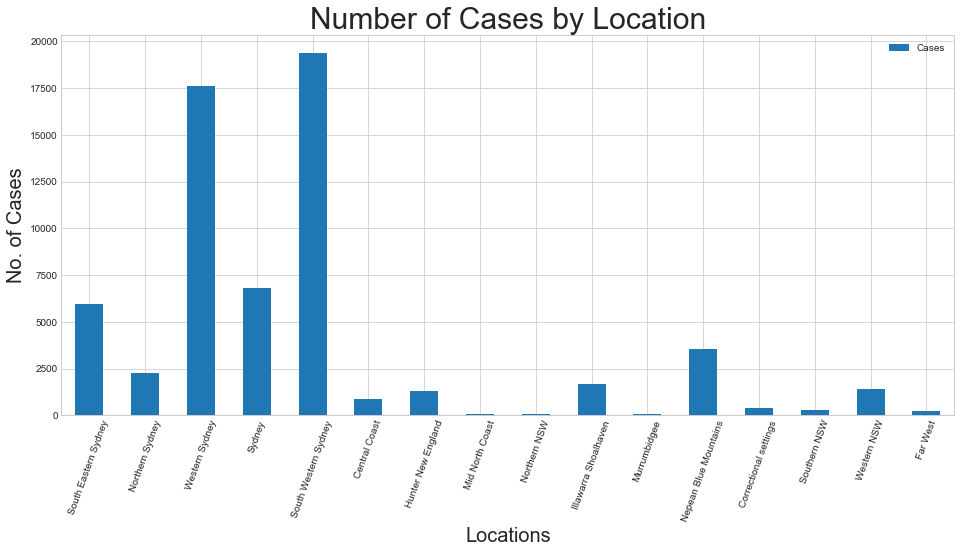

In [168]:
# Figure 3:
# bar graph for the number of cases
# can be used for visualisation
df3.plot(kind="bar", x="lhd_2010_name", y="Cases")
plt.xticks(rotation=70, horizontalalignment="center")
plt.title("Number of Cases by Location", fontsize=30)
plt.xlabel("Locations", fontsize=20)
plt.ylabel("No. of Cases", fontsize=20)

## Figure 3 shows the bar plot of the number of COVID-19 confirmed cases in terms of different locations in Australia. The bar plot shows the frequency of cases each location has recorded. South Western Sydney has the highest COVID-19 cases (19375) and Mid North Coast has the lowest confirmed cases (76). 